In [1]:
import cv2

In [3]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

img = cv2.imread('Photograph.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M) 

{'m00': 14.0, 'm10': 5354.166666666666, 'm01': 6550.5, 'm20': 2047658.8333333333, 'm11': 2505165.083333333, 'm02': 3064983.5, 'm30': 783114338.1500001, 'm21': 958076327.8333334, 'm12': 1172163229.4666667, 'm03': 1434131929.25, 'mu20': 8.783730159047991, 'mu11': -11.255952380597591, 'mu02': 51.33928571455181, 'mu30': 0.34647583961486816, 'mu21': -4.68523256987919, 'mu12': 13.370152976654936, 'mu03': -0.2308673858642578, 'nu20': 0.044814949791061175, 'nu11': -0.05742832847243669, 'nu02': 0.26193513119669287, 'nu30': 0.00047244675095979403, 'nu21': -0.006388678955481898, 'nu12': 0.01823124331173416, 'nu03': -0.0003148056339956961}


In [6]:
area = cv2.contourArea(cnt)

In [7]:
area

14.0

In [9]:
contours

[array([[[383, 464]],
 
        [[383, 465]],
 
        [[381, 467]],
 
        [[381, 471]],
 
        [[382, 471]],
 
        [[383, 472]],
 
        [[383, 468]],
 
        [[384, 467]],
 
        [[384, 464]]], dtype=int32),
 array([[[ 71, 462]],
 
        [[ 72, 461]],
 
        [[ 73, 462]],
 
        [[ 72, 463]]], dtype=int32),
 array([[[ 43, 453]],
 
        [[ 44, 452]],
 
        [[ 45, 452]],
 
        [[ 54, 461]],
 
        [[ 54, 462]],
 
        [[ 55, 463]],
 
        [[ 55, 465]],
 
        [[ 53, 467]],
 
        [[ 51, 465]],
 
        [[ 51, 464]],
 
        [[ 47, 460]],
 
        [[ 47, 459]],
 
        [[ 45, 457]],
 
        [[ 45, 456]],
 
        [[ 44, 455]],
 
        [[ 44, 454]]], dtype=int32),
 array([[[ 32, 420]],
 
        [[ 33, 419]],
 
        [[ 35, 421]],
 
        [[ 35, 422]],
 
        [[ 37, 424]],
 
        [[ 37, 425]],
 
        [[ 38, 426]],
 
        [[ 38, 427]],
 
        [[ 40, 429]],
 
        [[ 40, 431]],
 
        [[ 42, 433]],
 
 

In [13]:
 contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [1]:
import imutils

ModuleNotFoundError: No module named 'imutils'

In [2]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=c27c073fcae5a25ede30e44ede023335bff4a0c0caf8a9a39415b5f0db235298
  Stored in directory: c:\users\vithal\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [1]:
from imutils.video import VideoStream
from imutils.video import FPS
import argparse
import imutils
import time
import cv2

In [2]:
cv2

<module 'cv2.cv2' from 'C:\\Users\\Vithal\\Anaconda3\\lib\\site-packages\\cv2\\cv2.cp37-win_amd64.pyd'>

In [5]:
cv2.version

<module 'cv2.version' from 'C:\\Users\\Vithal\\Anaconda3\\lib\\site-packages\\cv2\\version.py'>

usage: ipykernel_launcher.py [-h] [-v VIDEO] [-t TRACKER]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Vithal\AppData\Roaming\jupyter\runtime\kernel-5b3faa66-e2a6-4de9-b261-bb2d6011a232.json


SystemExit: 2

C:\Users\Vithal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
#!/usr/bin/env python
 
'''
Welcome to the Object Tracking Program!
 
Using real-time streaming video from your built-in webcam, this program:
  - Creates a bounding box around a moving object
  - Calculates the coordinates of the centroid of the object
  - Tracks the centroid of the object
 
Author:
  - Addison Sears-Collins
  - https://automaticaddison.com
'''
 
from __future__ import print_function # Python 2/3 compatibility
import cv2 # Import the OpenCV library
import numpy as np # Import Numpy library
 
# Project: Object Tracking
# Author: Addison Sears-Collins 
# Website: https://automaticaddison.com
# Date created: 06/13/2020
# Python version: 3.7
 
def main():
    """
    Main method of the program.
    """
 
    # Create a VideoCapture object
    cap = cv2.VideoCapture(0)
 
    # Create the background subtractor object
    # Use the last 700 video frames to build the background
    back_sub = cv2.createBackgroundSubtractorMOG2(history=700, 
        varThreshold=25, detectShadows=True)
 
    # Create kernel for morphological operation
    # You can tweak the dimensions of the kernel
    # e.g. instead of 20,20 you can try 30,30.
    kernel = np.ones((20,20),np.uint8)
 
    while(True):
 
        # Capture frame-by-frame
        # This method returns True/False as well
        # as the video frame.
        ret, frame = cap.read()
 
        # Use every frame to calculate the foreground mask and update
        # the background
        fg_mask = back_sub.apply(frame)
 
        # Close dark gaps in foreground object using closing
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)
 
        # Remove salt and pepper noise with a median filter
        fg_mask = cv2.medianBlur(fg_mask, 5) 
         
        # Threshold the image to make it either black or white
        _, fg_mask = cv2.threshold(fg_mask,127,255,cv2.THRESH_BINARY)
 
        # Find the index of the largest contour and draw bounding box
        fg_mask_bb = fg_mask
        contours, hierarchy = cv2.findContours(fg_mask_bb,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]
        areas = [cv2.contourArea(c) for c in contours]
 
        # If there are no countours
        if len(areas) < 1:
 
            # Display the resulting frame
            cv2.imshow('frame',frame)
 
            # If "q" is pressed on the keyboard, 
            # exit this loop
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
 
            # Go to the top of the while loop
            continue
 
        else:
            # Find the largest moving object in the image
            max_index = np.argmax(areas)
 
        # Draw the bounding box
        cnt = contours[max_index]
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
 
        # Draw circle in the center of the bounding box
        x2 = x + int(w/2)
        y2 = y + int(h/2)
        cv2.circle(frame,(x2,y2),4,(0,255,0),-1)
 
        # Print the centroid coordinates (we'll use the center of the
        # bounding box) on the image
        text = "x: " + str(x2) + ", y: " + str(y2)
        cv2.putText(frame, text, (x2 - 10, y2 - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
         
        # Display the resulting frame
        cv2.imshow('frame',frame)
 
        # If "q" is pressed on the keyboard, 
        # exit this loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
    # Close down the video stream
    cap.release()
    cv2.destroyAllWindows()
 
if __name__ == '__main__':
    print(__doc__)
    main()


Welcome to the Object Tracking Program!
 
Using real-time streaming video from your built-in webcam, this program:
  - Creates a bounding box around a moving object
  - Calculates the coordinates of the centroid of the object
  - Tracks the centroid of the object
 
Author:
  - Addison Sears-Collins
  - https://automaticaddison.com



In [1]:
import cv2

In [15]:
img = cv2.imread('Photograph.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
cv2.imshow('image',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('image',ret)
cv2.waitKey(0)
cv2.destroyAllWindows()
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
cv2.imshow('image',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

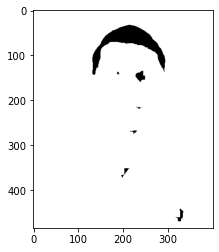

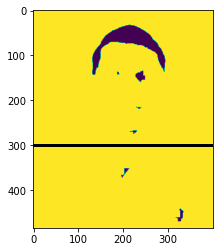

In [78]:
import numpy as np
import matplotlib.pyplot as plt
kernel = np.ones((15,15),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

x = [0, 400]
y = [300, 300]
plt.plot(x, y, color="black", linewidth=3)
plt.imshow(dilated)
plt.show()

In [45]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

countour detection in only certain area


In [79]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 300) & (y >= 200) & (cv2.contourArea(cntr) >= 0):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

13

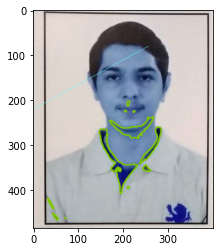

In [86]:
img = cv2.imread('Photograph.jpg')
dmy =img.copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 220),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()